In [ ]:
# Implement the propagator matrix approach to 

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def P(omega,k,z,z0,mu=10e10,poisson=0.25,rho=2500):
    
    M = 2*mu*(1-poisson) / (1-2*poisson)
    alpha =  np.sqrt ( M /rho )
    beta = np.sqrt(mu/rho)
    gamma = np.sqrt(k**2 - omega**2 / alpha**2)
    nu = np.sqrt(k**2 - omega**2 / beta**2)
    
    sh2_g = np.sinh(gamma*(z-z0)/2)**2
    sh2_v = np.sinh(nu*(z-z0)/2)**2
    sh_v  = np.sinh(nu*(z-z0))
    sh_g  = np.sinh(gamma*(z-z0))

    P11 = 1 + 2*mu/omega**2/rho * (2*k**2 * sh2_g - (k**2+nu**2)*sh2_v)
    P12 = k*mu/omega**2/rho * ((k**2+nu**2)*sh_g/gamma - 2*nu*sh_v)
    P13 = 1/omega**2/rho*(k**2/gamma *sh_g - nu*sh_v)
    P14 = 2*k/omega**2/rho*(sh2_g - sh2_v)
    
    P21 = k*mu/omega**2/rho*((k**2+nu**2)*sh_v/nu - 2*gamma*sh_g)
    P22 = 1 + 2*mu/omega**2/rho * (2*k**2*sh2_v - (k**2+nu**2)*sh2_g)
    P23 = -P14
    P24 = 1/omega**2/rho*(2*k**2*sh_v/nu - gamma*sh_g)
    
    P31 = mu**2/omega**2/rho*(4*k**2*gamma*sh_g - (k**2+nu**2)**2*sh_v/nu)
    P32 = 2*mu**2*(k**2+nu**2)*P14
    P33 = P11
    P34 = -P21
    
    P41 = -P32
    P42 = mu**2/omega**2/rho * (4*k**2*nu*sh_v - (k**2+nu**2)**2*sh_g/gamma)
    P43 = -P12
    P44 = P22
    
    return np.array([[P11,P12,P13,P14],
                     [P21,P22,P23,P24],
                     [P31,P32,P33,P34],
                     [P41,P42,P43,P44]])

# Single layer case
Solve $f(z) = P(z,z0)f(z0)$ where $f = (r_1, r_2, r_3, r_4)$ is the Rayleigh wave stress-motion vector, i.e., $r_1$ and $r_2$ are the amplitude coefficients for the horizontal and vertical components of displacement and $r_3$ and $r_4$ are the amplitude coefficients for $\tau_{zx}$ and $\tau_{zz}$.

When there is a rigid boundary at $z=z_n$, we set $r_1=r_2=0$ there.  Similarly, a free surface has

In [48]:
def find_rayleigh(freq = 2):
    free_surface = 0
    zn = 10e3
    L = np.linspace(1e3,6e3,1000)
    det=[]
    for wavelength in L:
        if freq*wavelength > 6325: 
            det.append(np.inf)
            continue
        mat = P(freq*2*np.pi,2*np.pi/wavelength,free_surface,zn)
        f1 = np.array([[0],[0],[1],[0]])
        f2 = np.array([[0],[0],[0],[1]])
        set1 = mat.dot(f1)
        set2 = mat.dot(f2)
        combo = np.array([ [set1[2][0],set2[2][0]], [set1[3][0],set2[3][0]] ])
        det.append(np.linalg.det(combo))
    det=np.array(det)
    this_L = L[np.argmin(np.abs(det))]
    return this_L
#     plt.plot(L[det>0],det[det>0])
#     plt.plot(L[det<0],-det[det<0])
#     plt.yscale('log')
#     plt.show()

<ipython-input-21-c944a65b3fd9>:7: RuntimeWarning: invalid value encountered in sqrt
  nu = np.sqrt(k**2 - omega**2 / beta**2)
/home/bradlipovsky/anaconda3/lib/python3.8/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


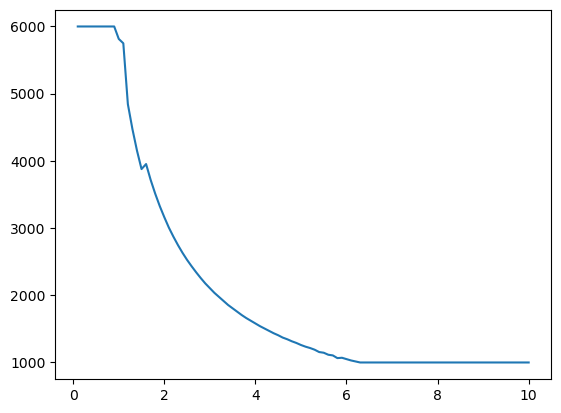

In [53]:
fs = np.linspace(0.1,10,100)
c = []
for freq in fs:
    c.append(find_rayleigh(freq=freq))
    
plt.subplots()
plt.plot(fs,c)
plt.show()